In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(777)

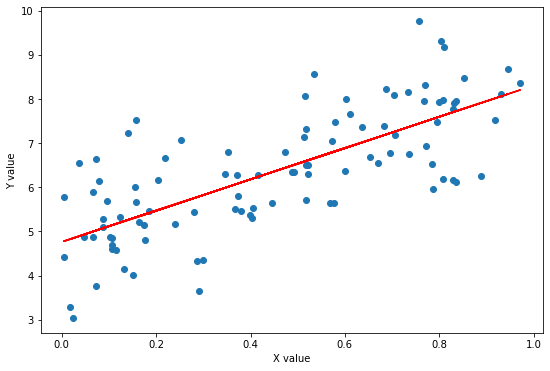

In [67]:
# a) Geneare n = 100 . Plot the data. Fit a linear regression line model and add it to the plot

B0 = 5
B1 = 3
ei = np.random.normal(0, 1, 100)
X = np.random.uniform(0,1,100)
# yi = B0 + B1x + e

Y = B0+np.dot(B1,X)+ei

# Reshape the vector to (100,1)
X = X.reshape(-1, 1)
Y = Y.reshape(-1,1)

# call class
model = LinearRegression()
y = model.fit(X,Y)
b1 = model.coef_
b0 = model.intercept_
y = b0 + (b1*X)


# show scatter plot
plt.figure(figsize=(9, 6))
plt.plot(X, y, color='r')
plt.xlabel("X value")
plt.ylabel("Y value")
plt.scatter(X, Y)
plt.show();





In [72]:
# b) Repeat 1000 times

# To estimate B1 1000 times, create a function
def B1_hat(X, ei):
    Y = B0 + (B1*X) + ei
    Y = Y.reshape(-1,1)
    X = X.reshape(-1,1)
    model = LinearRegression()
    model.fit(X,Y)
    B1_hat = model.coef_[0][0]
    return B1_hat


lst = []

# create loop for 1000 times
cnt = 0
while True:
    ei = np.random.normal(0, 1, 100)
    X = np.random.uniform(0,1,100)
    lst.append(B1_hat(X, ei))
    cnt += 1

    if cnt == 1000:
        break

mean = sum(lst)/1000

print(f"The mean of B1_hat is {mean}")

The mean of B1_hat is 2.9899519260620515


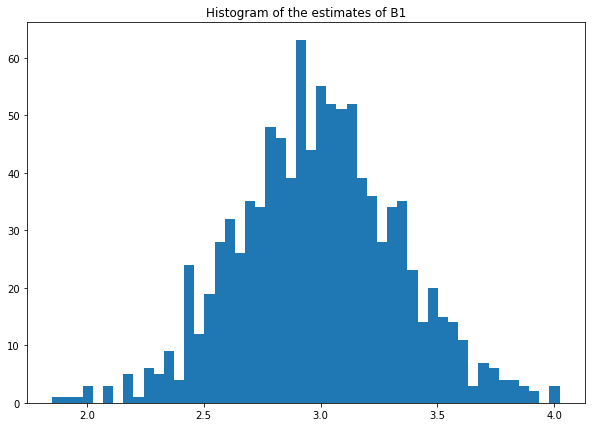

In [79]:
plt.figure(figsize = (10,7))
plt.hist(lst, 50)
plt.title("Histogram of the estimates of B1")
plt.show()

In [89]:
# c) Repeat b with ei as a standard Cauchy distribution 

lst1 = []
i = 0
while i < 1000:
    ei = np.random.standard_cauchy(100)
    X = np.random.uniform(0,1,100)
    lst1.append(B1_hat(X, ei))
    i += 1


mean_c = sum(lst1)/1000
print(f"The mean of B1_hat is {mean_c}")

The mean of B1_hat is -3.354507573305049


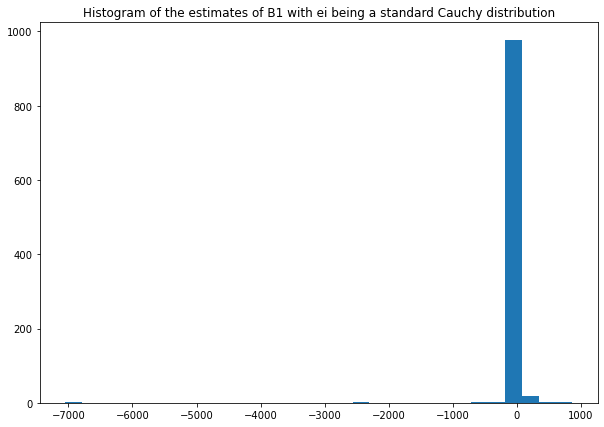

In [92]:
# Print the histogram 

plt.figure(figsize = (10,7))
plt.hist(lst1, 30)
plt.title("Histogram of the estimates of B1 with ei being a standard Cauchy distribution")
plt.show()